In [1]:
import numpy as np
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/active-nba-players-10-year-injury-history/Injury_History.csv
/kaggle/input/202122-nba-season-active-nba-players/active_players_2.csv


In [2]:
df = pd.read_csv("/kaggle/input/active-nba-players-10-year-injury-history/Injury_History.csv")

df.head()

,Name,Team,Position,Date,Notes
0,Jaylen Brown,Boston Celtics,SG,11/01/2017,sprained right ankle (DTD)
1,Jaylen Brown,Boston Celtics,SG,13/01/2017,returned to lineup
2,Jaylen Brown,Boston Celtics,SG,13/02/2017,placed on IL with strained right hip flexor
3,Jaylen Brown,Boston Celtics,SG,24/02/2017,activated from IL
4,Jaylen Brown,Boston Celtics,SG,06/12/2017,placed on IL with right eye inflammation


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9280 entries, 0 to 9279
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      9280 non-null   object
 1   Team      9280 non-null   object
 2   Position  9280 non-null   object
 3   Date      9280 non-null   object
 4   Notes     9280 non-null   object
dtypes: object(5)
memory usage: 362.6+ KB


There are no null values in our dataset.

In [4]:
df["Name"] = df["Name"].astype("str")
df["Team"] = df["Team"].astype("str")
df["Position"] = df["Position"].astype("str")
df["Notes"] = df["Notes"].astype("str")
df["Date"] = df["Date"].apply(pd.to_datetime)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9280 entries, 0 to 9279
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Name      9280 non-null   object        
 1   Team      9280 non-null   object        
 2   Position  9280 non-null   object        
 3   Date      9280 non-null   datetime64[ns]
 4   Notes     9280 non-null   object        
dtypes: datetime64[ns](1), object(4)
memory usage: 362.6+ KB


The datatypes are changed accordingly.

In [5]:
df.head()

,Name,Team,Position,Date,Notes
0,Jaylen Brown,Boston Celtics,SG,2017-11-01,sprained right ankle (DTD)
1,Jaylen Brown,Boston Celtics,SG,2017-01-13,returned to lineup
2,Jaylen Brown,Boston Celtics,SG,2017-02-13,placed on IL with strained right hip flexor
3,Jaylen Brown,Boston Celtics,SG,2017-02-24,activated from IL
4,Jaylen Brown,Boston Celtics,SG,2017-06-12,placed on IL with right eye inflammation


In [6]:
df['Date'] = df["Date"].dt.strftime('%d-%m-%Y')

df.head()

,Name,Team,Position,Date,Notes
0,Jaylen Brown,Boston Celtics,SG,01-11-2017,sprained right ankle (DTD)
1,Jaylen Brown,Boston Celtics,SG,13-01-2017,returned to lineup
2,Jaylen Brown,Boston Celtics,SG,13-02-2017,placed on IL with strained right hip flexor
3,Jaylen Brown,Boston Celtics,SG,24-02-2017,activated from IL
4,Jaylen Brown,Boston Celtics,SG,12-06-2017,placed on IL with right eye inflammation


Changed the date to day-month-year format.

In [7]:
df.describe()

,Name,Team,Position,Date,Notes
count,9280,9280,9280,9280,9280
unique,344,30,7,1734,1552
top,Kevin Love,Los Angeles Lakers,C,04-12-2017,activated from IL
freq,139,715,1943,35,2480


There are 344 unique NBA players who are actively playing in the 2021-22 NBA season.

These 344 players have 9280 injury updates.

There are 30 NBA teams as expected.

Only 1552 notes are unique from the 9280.

In [8]:
df["Notes"].value_counts()

activated from IL                                                             2480
returned to lineup                                                            1035
placed on IL                                                                   627
rest (DTD)                                                                     147
placed on IL with illness                                                      117
                                                                              ... 
arthroscopic surgery on right hip to repair torn labrum (out indefinitely)       1
sore left shoulder (out for season)                                              1
placed on IL with illness (F)                                                    1
left thigh injury (out for season)                                               1
sore chest (P) / shoulder injury (CBC) (DNP)                                     1
Name: Notes, Length: 1552, dtype: int64

From this line of code we can see the most common injury notes. They are mostly about the IL spot's status.

In [9]:
df[df["Name"] == "Paul George"]

,Name,Team,Position,Date,Notes
5365,Paul George,Los Angeles Clippers,SG,28-11-2010,placed on IL
5366,Paul George,Los Angeles Clippers,SG,13-12-2010,activated from IL
5367,Paul George,Los Angeles Clippers,SG,17-12-2010,placed on IL
5368,Paul George,Los Angeles Clippers,SG,29-12-2010,activated from IL
5369,Paul George,Los Angeles Clippers,SG,01-12-2013,placed on IL with illness
5370,Paul George,Los Angeles Clippers,SG,13-01-2013,activated from IL
5371,Paul George,Los Angeles Clippers,SG,17-04-2013,DNP
5372,Paul George,Los Angeles Clippers,SG,04-09-2014,rest (DNP)
5373,Paul George,Los Angeles Clippers,SG,08-01-2014,surgery on right leg to repair fractured tibia...
5374,Paul George,Los Angeles Clippers,SG,29-10-2014,placed on IL recovering from surgery on right ...


With boolean masking, we can look for a specific player's injury records.

In this example, we can see Paul George's injury records from 2010 to 2020 as he had many injury updates.

Players with most injury updates.

In [10]:
df["Name"].value_counts()

Kevin Love        139
Eric Gordon       127
Derrick Rose      124
Kawhi Leonard     118
Kyrie Irving      112
                 ... 
Justin James        1
Wenyen Gabriel      1
Jontay Porter       1
Darius Garland      1
Kelan Martin        1
Name: Name, Length: 344, dtype: int64

In [11]:
df["Position"].value_counts()

C     1943
PF    1835
PG    1823
SG    1634
SF    1562
F      278
G      205
Name: Position, dtype: int64

We can see that there are 7 positions. Since there are forwards (F) and guards(G) that has no specific position, we can convert other specific positions to general positions.

PG, SG --> G

SF,PF --> F

In [12]:
df["Position"] = df["Position"].replace({'PG':'G','SG':'G','SF':'F','PF':'F'})

<AxesSubplot:ylabel='Notes'>

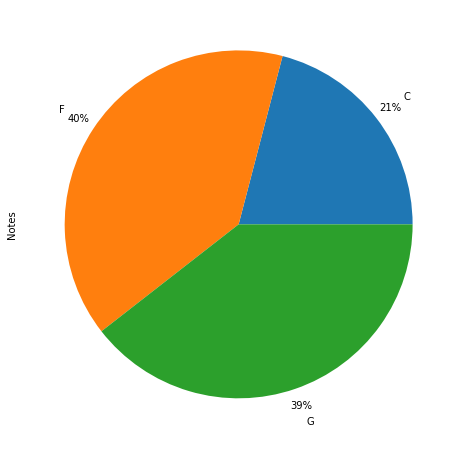

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))

df.groupby('Position')['Notes'].count().plot(kind="pie",autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)

From this pie chart, we can see how the total injury updates are distributed.

Forwards and Guards have almost the same amount of injury updates, as it is more than the Center's. 

Let's look at the distribution of the teams.

<AxesSubplot:ylabel='Notes'>

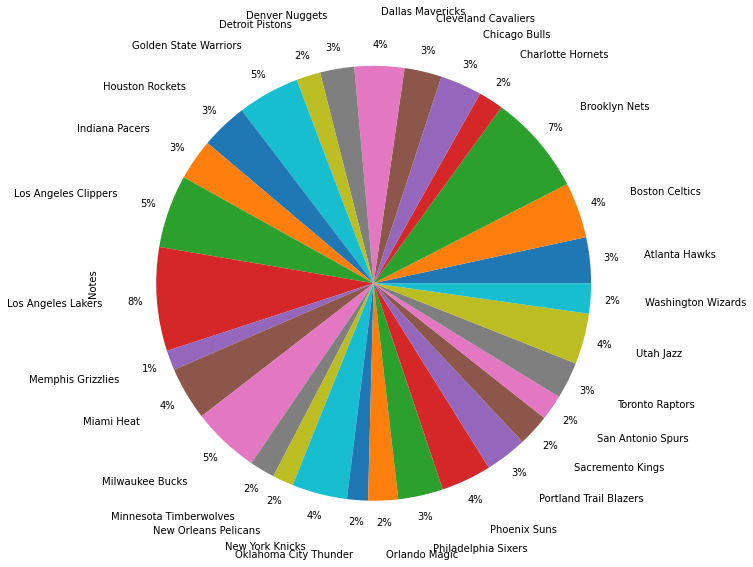

In [14]:
plt.figure(figsize=(15,10))

df.groupby('Team')['Notes'].count().plot(kind="pie",autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.25)

It seems like Lakers, Nets and Clippers have the most amount of injury updates.

<AxesSubplot:xlabel='Date'>

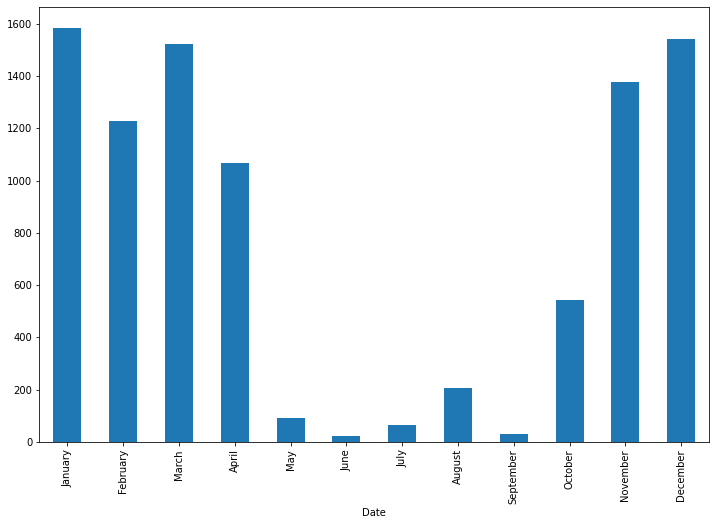

In [15]:
df['Date'] = pd.to_datetime(df['Date'])
plt.figure(figsize=(12,8))

months = ['January', 'February', 'March', 'April',
          'May', 'June', 'July', 'August',
          'September', 'October', 'November', 'December']

df.groupby(df["Date"].dt.strftime("%B"))["Notes"].count().reindex(months).plot(kind="bar")

From this bar graph graph, we can see that May, June, July, August and September has the least amount of injury updates.

Usually the regular NBA season starts mid-October and finishes mid-April. From mid-April to mid-June the NBA playoffs take place. Only 16 teams from 30 remains in the playoffs which shows the reason why the numbers decline starting from April.

It seems like with the start of the season in mid-October, the players are not quite warmed up and ready for NBA action. Even though there are no matches played in first weeks of the month, the injury update number is still a bit high.

The NBA All-Star break is usually mid-February. This might be the reason why the highest number of injury reports happen as the players wants to show their performances to fight for a spot in the all-star roster.

March is also a critical month to secure a place in the NBA playoffs and we can see that the number of injury updates increase substantially after February. The teams force their best players to play very high minutes to get the best result in playoff matchups.

<AxesSubplot:xlabel='Date'>

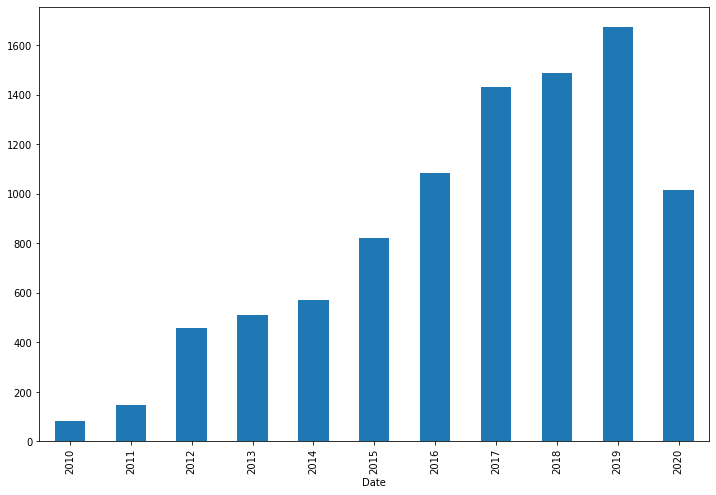

In [16]:
plt.figure(figsize=(12,8))

df.groupby(df["Date"].dt.strftime("%Y"))["Notes"].count().plot(kind="bar")

According to this dataset, the amount of injury updates has increased gradually over the years. This reason to that might be the fact that players these days are resting more and doing load management to stay healthy until the playoffs. Another reason could be that the creator of the "NBA Injuries from 2010 to 2020" dataset has included more data from these years.

The reason why the amount of updates have plummeted right after gradually increasing until 2019 is that the 2020 NBA season was suspended on March 11 because of the pandemic. The season resumed on July 30.

Let's try to look for certain injury types such as ankle, harmstring, achilles, shoulder, knee.

Creating new columns to map the injury type as True and False, later changed to 1 and 0.

In [17]:
df["Ankle"] = df["Notes"].str.contains("ankle").astype("int")
df["Hamstring"] = df["Notes"].str.contains("hamstring").astype("int")
df["Shoulder"] = df["Notes"].str.contains("shoulder").astype("int")
df["Knee"] = df["Notes"].str.contains("knee").astype("int")

df.head()

,Name,Team,Position,Date,Notes,Ankle,Hamstring,Shoulder,Knee
0,Jaylen Brown,Boston Celtics,G,2017-01-11,sprained right ankle (DTD),1,0,0,0
1,Jaylen Brown,Boston Celtics,G,2017-01-13,returned to lineup,0,0,0,0
2,Jaylen Brown,Boston Celtics,G,2017-02-13,placed on IL with strained right hip flexor,0,0,0,0
3,Jaylen Brown,Boston Celtics,G,2017-02-24,activated from IL,0,0,0,0
4,Jaylen Brown,Boston Celtics,G,2017-12-06,placed on IL with right eye inflammation,0,0,0,0


Creating a sub dataframe to work on our injury types.

Creating a new column named "Injury" to map the type of the injury. Injuries other than ankle, hamstring, shoulder and knee are mapped as Other.

In [18]:

df_inj = df[["Position","Ankle","Hamstring","Shoulder","Knee"]]


conditions = [
    df_inj["Ankle"] == 1,
    df_inj["Hamstring"] == 1,
    df_inj["Shoulder"] == 1,
    df_inj["Knee"] == 1    
]

categories = ["Ankle","Hamstring","Shoulder","Knee"]

df_inj["Injury"] = np.select(conditions, categories)

df_inj.drop(["Ankle"], axis=1, inplace=True)
df_inj.drop(["Hamstring"], axis=1, inplace=True)
df_inj.drop(["Shoulder"], axis=1, inplace=True)
df_inj.drop(["Knee"], axis=1, inplace=True)

df_inj["Injury"] = df_inj["Injury"].replace({"0":"Other"})

df_inj.head(20)




/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

,Position,Injury
0,G,Ankle
1,G,Other
2,G,Other
3,G,Other
4,G,Other
5,G,Other
6,G,Other
7,G,Other
8,G,Other
9,G,Knee


In [19]:
df_inj["Injury"].value_counts()

Other        7030
Ankle         922
Knee          885
Shoulder      245
Hamstring     198
Name: Injury, dtype: int64

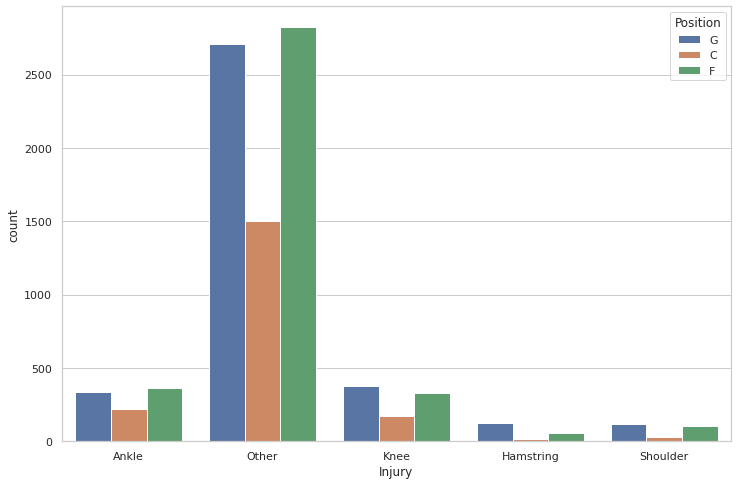

In [20]:
import seaborn as sns

sns.set_theme(style="whitegrid")

plt.figure(figsize=(12,8))
ax = sns.countplot(x="Injury", data=df_inj, hue="Position")

As we saw earlier, most of the injury updates were about the changes in the IL spot. Therefore, the injury types that we are looking for are much less than the "other" injury types.

Bear in mind that the percentages of the positions
- F : 40%
- G : 39%
- C : 21%

From the countplot above, we can see that there are nothing out of the ordinary. The distribution is as expected. We can say that forwards face less hamstring injuries than guards but because the sample size is only 198, it might not be a solid guess.

Let's check back our main dataframe.

In [21]:
df.head()

,Name,Team,Position,Date,Notes,Ankle,Hamstring,Shoulder,Knee
0,Jaylen Brown,Boston Celtics,G,2017-01-11,sprained right ankle (DTD),1,0,0,0
1,Jaylen Brown,Boston Celtics,G,2017-01-13,returned to lineup,0,0,0,0
2,Jaylen Brown,Boston Celtics,G,2017-02-13,placed on IL with strained right hip flexor,0,0,0,0
3,Jaylen Brown,Boston Celtics,G,2017-02-24,activated from IL,0,0,0,0
4,Jaylen Brown,Boston Celtics,G,2017-12-06,placed on IL with right eye inflammation,0,0,0,0


Dropping the injury columns.

In [22]:
df.drop(["Ankle"], axis=1, inplace=True)
df.drop(["Hamstring"], axis=1, inplace=True)
df.drop(["Shoulder"], axis=1, inplace=True)
df.drop(["Knee"], axis=1, inplace=True)

df.head()

,Name,Team,Position,Date,Notes
0,Jaylen Brown,Boston Celtics,G,2017-01-11,sprained right ankle (DTD)
1,Jaylen Brown,Boston Celtics,G,2017-01-13,returned to lineup
2,Jaylen Brown,Boston Celtics,G,2017-02-13,placed on IL with strained right hip flexor
3,Jaylen Brown,Boston Celtics,G,2017-02-24,activated from IL
4,Jaylen Brown,Boston Celtics,G,2017-12-06,placed on IL with right eye inflammation


We have done data analysis on teams, positions, dates and notes. To do further analysis, let's import a new dataset.

The active players dataset is a dataset that I have prepared by using the information on ESPN. It also includes Age, Height, Weight, College and Salary as in 2021.

In [23]:
df2 = pd.read_csv("/kaggle/input/202122-nba-season-active-nba-players/active_players_2.csv")

df2.head()

,Name,Team,Position,Age,Height,Height_i,Weight,College,Salary
0,Juhann Begarin,Boston Celtics,SG,19,"6' 5""",6.50,185,NaN,NaN
1,Jaylen Brown,Boston Celtics,SG,24,"6' 6""",6.60,223,California,26758928.0
2,Kris Dunn,Boston Celtics,PG,27,"6' 3""",6.30,205,Providence,5005350.0
3,Carsen Edwards,Boston Celtics,PG,23,"5' 11""",5.11,200,Purdue,1782621.0
4,Tacko Fall,Boston Celtics,C,25,"7' 5""",7.50,311,UCF,NaN


In [24]:
df.head()

,Name,Team,Position,Date,Notes
0,Jaylen Brown,Boston Celtics,G,2017-01-11,sprained right ankle (DTD)
1,Jaylen Brown,Boston Celtics,G,2017-01-13,returned to lineup
2,Jaylen Brown,Boston Celtics,G,2017-02-13,placed on IL with strained right hip flexor
3,Jaylen Brown,Boston Celtics,G,2017-02-24,activated from IL
4,Jaylen Brown,Boston Celtics,G,2017-12-06,placed on IL with right eye inflammation


We have Name, Team and Position as common columns for these datasets. Let's try to merge them into a one dataset.

In [25]:
df2 = df2[["Name","Age","Height_i","Weight","College","Salary"]]

df_f = pd.merge(df, df2, how= "left", on=["Name"])

df_f = df_f[["Name","Position","Age", "Height_i", "Weight", "Team", "Salary", "College", "Date", "Notes"]]

df_f.head()

,Name,Position,Age,Height_i,Weight,Team,Salary,College,Date,Notes
0,Jaylen Brown,G,24,6.6,223,Boston Celtics,26758928.0,California,2017-01-11,sprained right ankle (DTD)
1,Jaylen Brown,G,24,6.6,223,Boston Celtics,26758928.0,California,2017-01-13,returned to lineup
2,Jaylen Brown,G,24,6.6,223,Boston Celtics,26758928.0,California,2017-02-13,placed on IL with strained right hip flexor
3,Jaylen Brown,G,24,6.6,223,Boston Celtics,26758928.0,California,2017-02-24,activated from IL
4,Jaylen Brown,G,24,6.6,223,Boston Celtics,26758928.0,California,2017-12-06,placed on IL with right eye inflammation


Height_i column represents the player's height in inches but it is represented with a dot to be an integer. This way it would be easier to analyze.

Salary is player's salary as US Dollars on 2021.

Weight is represented in lbs.

Creating a new df named df_u to see unique entries of players.
Dropping the duplicate names to have players with 1 unique entry.

In [26]:
df_u = df_f.drop_duplicates(subset=["Name"], keep="first")

df_u.reset_index(inplace=False)

df_u.head()

,Name,Position,Age,Height_i,Weight,Team,Salary,College,Date,Notes
0,Jaylen Brown,G,24,6.6,223,Boston Celtics,26758928.0,California,2017-01-11,sprained right ankle (DTD)
39,Kris Dunn,G,27,6.3,205,Boston Celtics,5005350.0,Providence,2017-02-03,right hand injury (DTD)
61,Tacko Fall,C,25,7.5,311,Boston Celtics,NaN,UCF,2019-10-22,concussion (DTD)
64,Bruno Fernando,F,23,6.9,240,Boston Celtics,1782621.0,Maryland,2020-01-08,placed on IL with strained left calf
69,Al Horford,C,35,6.9,240,Boston Celtics,27000000.0,Florida,2011-01-21,placed on IL with sore right ankle


In [27]:
df_u.shape

(344, 10)

We have 344 player left in the unique player dataframe.

In [28]:
df_u.describe()

,Age,Height_i,Weight,Salary
count,344.000000,344.000000,344.000000,3.010000e+02
mean,27.313953,6.489767,219.017442,1.094308e+07
std,3.907865,0.326224,25.238102,1.076599e+07
min,20.000000,5.100000,170.000000,1.669178e+06
25%,24.000000,6.200000,200.000000,2.283034e+06
50%,27.000000,6.500000,215.500000,7.000000e+06
75%,30.000000,6.700000,235.000000,1.562500e+07
max,41.000000,7.500000,311.000000,4.578097e+07


<AxesSubplot:xlabel='Age'>

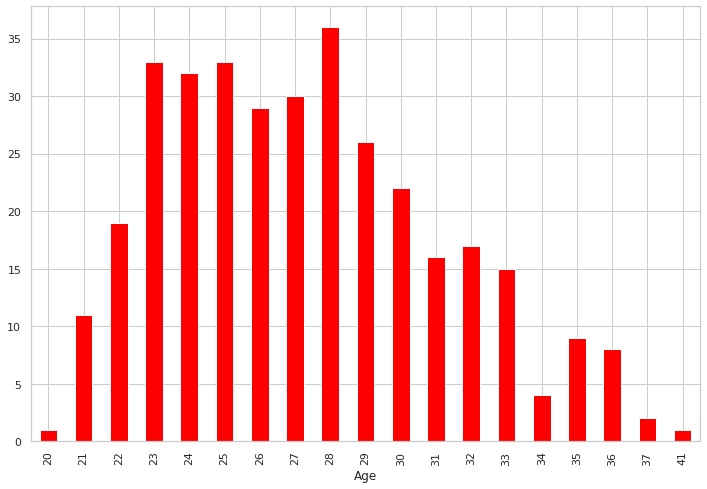

In [29]:
plt.figure(figsize=(12,8))
df_u.groupby("Age")["Notes"].count().plot(kind="bar", color="red")

The distributions is close to a normal distribution other than the 34 year olds.

Let's find the 41 year old player.

In [30]:
df_u[df_u["Age"]==41]

,Name,Position,Age,Height_i,Weight,Team,Salary,College,Date,Notes
4086,Udonis Haslem,F,41,6.8,235,Miami Heat,1669178.0,Florida,2010-11-22,placed on IL with torn ligament in left foot (...


<AxesSubplot:xlabel='Height_i'>

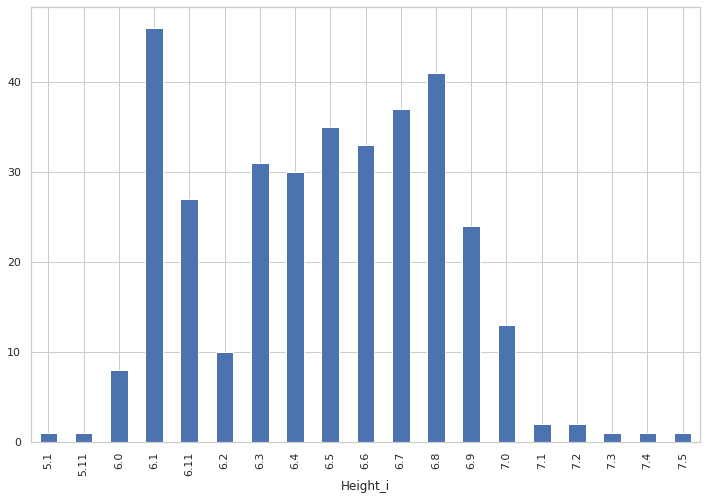

In [31]:
plt.figure(figsize=(12,8))
df_u.groupby("Height_i")["Notes"].count().plot(kind="bar")

The distribution is similar to a bimodal distribution.

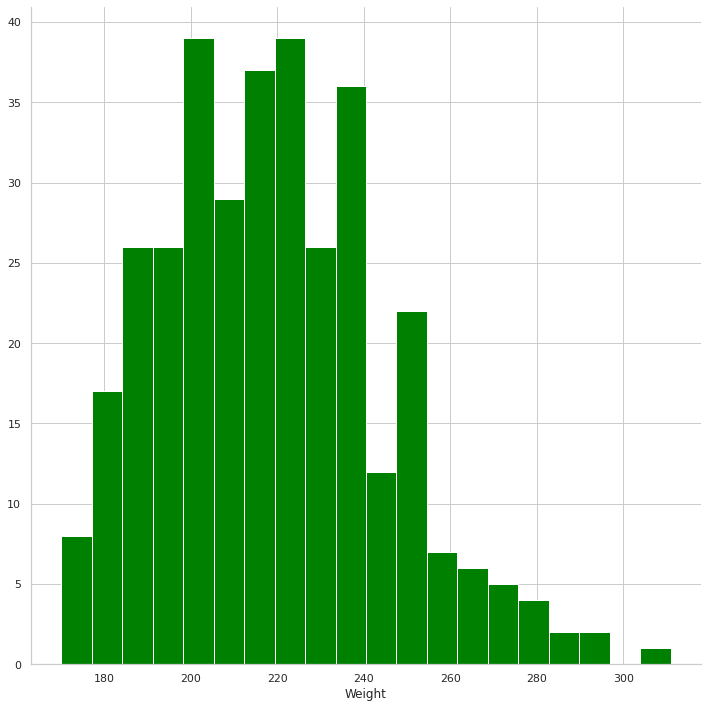

In [32]:
weight_plot = sns.FacetGrid(df_u, height = 10)
weight_plot.map(plt.hist,"Weight",bins = 20, color = "green")

The weight distribution is right skewed.

Changing Salary to million dollars to have a better plot.

In [33]:
df_f["Salary"] = df_f["Salary"] / 1000000
df_u["Salary"] = df_u["Salary"] / 1000000


df_u.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Name,Position,Age,Height_i,Weight,Team,Salary,College,Date,Notes
0,Jaylen Brown,G,24,6.6,223,Boston Celtics,26.758928,California,2017-01-11,sprained right ankle (DTD)
39,Kris Dunn,G,27,6.3,205,Boston Celtics,5.005350,Providence,2017-02-03,right hand injury (DTD)
61,Tacko Fall,C,25,7.5,311,Boston Celtics,NaN,UCF,2019-10-22,concussion (DTD)
64,Bruno Fernando,F,23,6.9,240,Boston Celtics,1.782621,Maryland,2020-01-08,placed on IL with strained left calf
69,Al Horford,C,35,6.9,240,Boston Celtics,27.000000,Florida,2011-01-21,placed on IL with sore right ankle


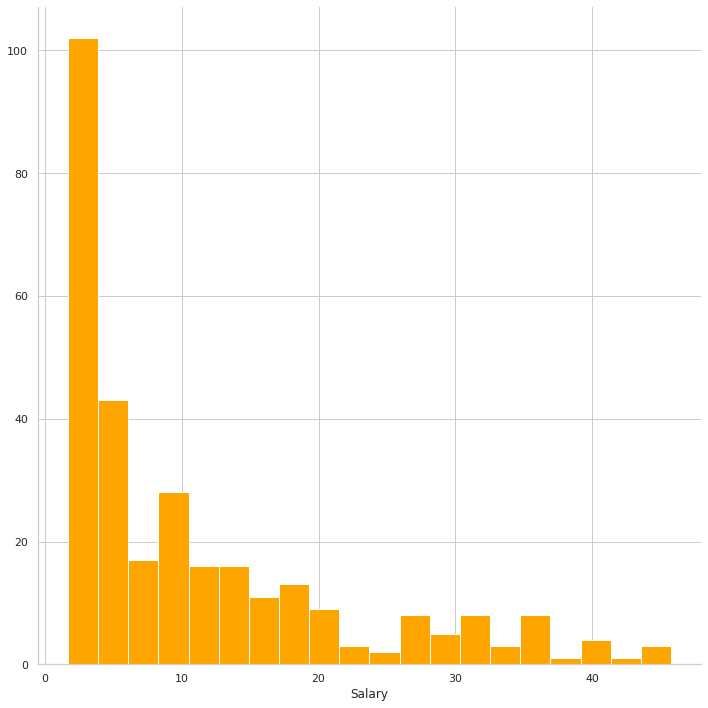

In [34]:
salary_plot = sns.FacetGrid(df_u, height = 10)
salary_plot.map(plt.hist,"Salary",bins = 20, color = "orange")

The salary distribution is right skewed and it shows the income inequeality in the NBA.

In [35]:
df_f["College"].value_counts()

Kentucky                     622
Duke                         550
UCLA                         475
Texas                        343
Indiana                      266
                            ... 
David Lipscomb University      2
Minnesota                      2
Texas Tech                     2
Tulsa                          2
Belmont                        1
Name: College, Length: 106, dtype: int64

In [36]:
df_u["College"].value_counts()

Kentucky           22
Duke               19
UCLA               10
Texas               9
Kansas              8
                   ..
San Diego State     1
Oklahoma State      1
Providence          1
Dayton              1
Texas Tech          1
Name: College, Length: 106, dtype: int64

The last 2 outputs look correlated as colleges sending more players to the NBA would result in more injury updates. So, it would not be correct to say that player's from Kentucky or Duke are more prone to injuries. They have more injury updates since they are the colleges that sends the most players to the NBA.

In [37]:
df_f.head()

,Name,Position,Age,Height_i,Weight,Team,Salary,College,Date,Notes
0,Jaylen Brown,G,24,6.6,223,Boston Celtics,26.758928,California,2017-01-11,sprained right ankle (DTD)
1,Jaylen Brown,G,24,6.6,223,Boston Celtics,26.758928,California,2017-01-13,returned to lineup
2,Jaylen Brown,G,24,6.6,223,Boston Celtics,26.758928,California,2017-02-13,placed on IL with strained right hip flexor
3,Jaylen Brown,G,24,6.6,223,Boston Celtics,26.758928,California,2017-02-24,activated from IL
4,Jaylen Brown,G,24,6.6,223,Boston Celtics,26.758928,California,2017-12-06,placed on IL with right eye inflammation


Creating a new column named Count to have the amount of injury updates a player has.

In [38]:
df_f["Count"] = df_f.groupby("Name")["Name"].transform("count")

df_f.head()

,Name,Position,Age,Height_i,Weight,Team,Salary,College,Date,Notes,Count
0,Jaylen Brown,G,24,6.6,223,Boston Celtics,26.758928,California,2017-01-11,sprained right ankle (DTD),39
1,Jaylen Brown,G,24,6.6,223,Boston Celtics,26.758928,California,2017-01-13,returned to lineup,39
2,Jaylen Brown,G,24,6.6,223,Boston Celtics,26.758928,California,2017-02-13,placed on IL with strained right hip flexor,39
3,Jaylen Brown,G,24,6.6,223,Boston Celtics,26.758928,California,2017-02-24,activated from IL,39
4,Jaylen Brown,G,24,6.6,223,Boston Celtics,26.758928,California,2017-12-06,placed on IL with right eye inflammation,39


In [39]:
df_f = df_f.drop_duplicates(subset=["Name"], keep="first")

df_f.drop(["Salary"], axis=1, inplace=True)
df_f.drop(["Date"], axis=1, inplace=True)
df_f.drop(["Notes"], axis=1, inplace=True)

df_f.head()

,Name,Position,Age,Height_i,Weight,Team,College,Count
0,Jaylen Brown,G,24,6.6,223,Boston Celtics,California,39
39,Kris Dunn,G,27,6.3,205,Boston Celtics,Providence,22
61,Tacko Fall,C,25,7.5,311,Boston Celtics,UCF,3
64,Bruno Fernando,F,23,6.9,240,Boston Celtics,Maryland,5
69,Al Horford,C,35,6.9,240,Boston Celtics,Florida,78


In [40]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

df_f["Position"] = df_f["Position"].astype("str")
df_f["Team"] = df_f["Team"].astype("str")


df_f["position_code"] = label.fit_transform(df_f["Position"])
df_f["team_code"] = label.fit_transform(df_f["Team"])


df_f.drop(["Position"], axis=1, inplace=True)
df_f.drop(["Team"], axis=1, inplace=True)
df_f.drop(["College"], axis=1, inplace=True)
df_f.drop(["Name"], axis=1, inplace=True)




In [41]:
df_f.head()

,Age,Height_i,Weight,Count,position_code,team_code
0,24,6.6,223,39,2,1
39,27,6.3,205,22,2,1
61,25,7.5,311,3,0,1
64,23,6.9,240,5,1,1
69,35,6.9,240,78,0,1


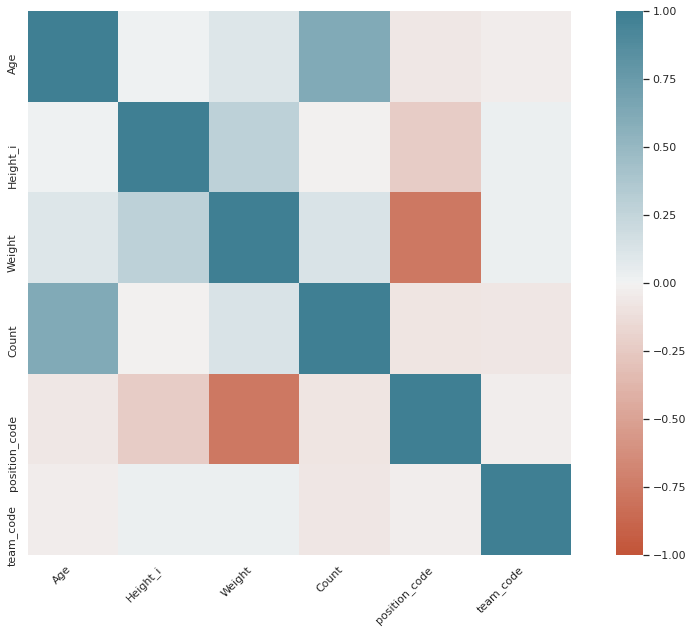

In [42]:
plt.figure(figsize=(16,10))

corr = df_f.corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

plt.show()

There is a negative correlation between weight and position since centers are heavier.

Age and Count has a correlation as it was explained before.

Our target variable y is the Count column since we are going to predict a player's amount of injuries.

In [43]:
y = df_f["Count"]

X = df_f.drop(["Count"], axis=1)

In [44]:
y.reset_index(drop=True, inplace=True)

y.head()

0    39
1    22
2     3
3     5
4    78
Name: Count, dtype: int64

In [45]:
X.reset_index(drop=True, inplace=True)


X.head()

,Age,Height_i,Weight,position_code,team_code
0,24,6.6,223,2,1
1,27,6.3,205,2,1
2,25,7.5,311,0,1
3,23,6.9,240,1,1
4,35,6.9,240,0,1


In [46]:
y.shape

(344,)

In [47]:
X.shape

(344, 5)

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


Using linear regression to predict the injury counts

In [49]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()

LR.fit(X_train,y_train)

LinearRegression()

In [50]:
y_prediction =  LR.predict(X_test)
y_prediction

array([44.72208043, 31.27777924, 24.63173677, 62.59171349, 11.88679374,
       29.53340081,  8.47904909, 24.73969768, 27.72118313, 49.39439056,
       21.58767403, 17.64792878, 41.46461448, 17.85113047, 13.02803983,
       26.69145926, 29.34768935, 24.74939834, 43.56088108, 43.523436  ,
       18.24690325, 55.29215193, 10.81716334, 26.36480139, 63.14218248,
       64.90853169, 33.07786475, 30.07156301,  0.93271263, 10.22843698,
       55.19361627, 22.11744607, 27.93261094, 22.91410369, 22.31858974,
       36.71222039, 47.86994873, 40.8370151 , 39.21502715, 10.40883988,
       34.95879299, 31.73128626, 29.42252683, 37.96787817, 11.22360274,
       23.6480965 , 29.72824293, 13.34277168, 51.73283992, 17.78595762,
       26.69434079, 37.01563394, 16.12616233, 27.68374413, 24.9630543 ,
       45.465503  , 30.71599644, 12.70776071, 20.80789257, 34.24067725,
       27.55682294, 41.84229102,  1.42657171, 26.73314628, 34.85285408,
       22.63845551, 10.10460282, 14.66269683, 20.47904257,  6.61

In [51]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

score=r2_score(y_test,y_prediction)
print("r2 score is", score)
print("mean_sqrd_error is ",mean_squared_error(y_test,y_prediction))
print("root_mean_squared error of is ",np.sqrt(mean_squared_error(y_test,y_prediction)))


r2 score is 0.43355838882582187
mean_sqrd_error is  373.4642867078523
root_mean_squared error of is  19.32522410498394


In [52]:
LR.intercept_

-61.97711589656873

In [53]:
LR.coef_

array([ 3.92213599, -5.16729898,  0.07631652,  0.43839587, -0.10840645])

In [54]:
coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(LR.coef_))], axis = 1)
coefficients

,0,0
0,Age,3.922136
1,Height_i,-5.167299
2,Weight,0.076317
3,position_code,0.438396
4,team_code,-0.108406


Our multiple linear regression equation is:

y = -61.98 + 3.92*age - 5.17*height + 0.07*weight + 0.44*position_code - 0.11*team_code

<AxesSubplot:xlabel='Count'>

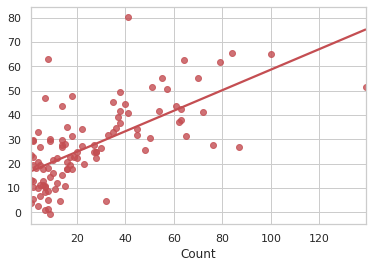

In [55]:
sns.regplot(x=y_test, y=y_prediction, ci=None, color="r")

Checking our predictions vs the actual scores.

In [56]:
res = pd.DataFrame()
res["actual"] = y_test
res["pred"] = y_prediction
res.head(15)


,actual,pred
194,40,44.722080
157,65,31.277779
225,20,24.631737
208,64,62.591713
318,12,11.886794
329,14,29.533401
319,7,8.479049
260,28,24.739698
114,76,27.721183
220,38,49.394391
